In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import load_iris # dataset-eg-3
from sklearn.svm import SVC # for results comparision

# Support Vector Machines

In [2]:
class Support_Vector_Classifier:    
    
    '''
        Initialize the class variables
    '''
    def __init__(self,num_iters=1000,learning_rate=0.01,verbose=False):
        self.num_iters = num_iters
        self.verbose   = verbose
        self.learning_rate = learning_rate
        self.op_format = [0,1]
                
    '''
        Function:        
        Hinge loss function : (1-y*f(x))+   where f(x) = wx +b
                                                           
    '''
    def cost(self,x,y):  
        return np.sum(1-y.reshape(x.shape[0],1)*np.dot(x,self.theta))#1 / 2 * np.dot(self.theta.T,self.theta)[0][0] +
   
    '''
       Function : Uses Gradient descent to find best/optimal weights
    '''
    def fit(self,x,y):
        
        # Assign (-1 and 1) class labels.
        self.op_format = list(np.unique(Y))
        y = np.where(y==0,-1,1)
        
        # Add Intercept
        m = x.shape[0]
        x = np.concatenate((np.ones((m, 1)), x), axis=1)
        
        # Initialize Weights
        self.theta = np.zeros((x.shape[1]))

        # Apply Stochastic Gradient Descent (SGD) to find optimal weights and minimal cost
        for i in range(1,self.num_iters):
            for j in range(m):
                if (y[j]*np.dot(x[j], self.theta)) < 1:
                    self.theta += self.learning_rate * (x[j]*y[j] + (-2*(1/i)*self.theta))
                else:
                    self.theta += self.learning_rate * (-2*(1/i)*self.theta)
            if self.verbose and i%(self.num_iters/10)==0:
                #self.cost_theta_list([i,self.cost(x,y)])
                print('Cost at ',i,'iteration',self.cost(x,y.reshape(-1,1)))
    
    '''
        Function : Predicts the output
    '''
    def predict(self,x,fit_intercept=True):
        if fit_intercept:
            m = x.shape[0]
            x = np.concatenate((np.ones((m, 1)), x), axis=1)
        if self.op_format==[0,1]:
            return np.where(np.dot(x,self.theta)<0,0,1)
        else:
            return np.where(np.dot(x,self.theta)<0,-1,1)

    '''
        Function : Generates Classification Report
    '''
    def classification_report(self,X,y):
        p = self.predict(X) 
        
        cm_df = pd.crosstab(p,y,rownames=['Predicted'],colnames=['Actual'])
        print('\nConfusion Matrix:\n',cm_df)
        
        TN = cm_df.loc[0,0] # Predicted = 0 and  Actual = 0
        TP = cm_df.loc[1,1] # Predicted = 1 and  Actual = 1
        FN = cm_df.loc[0,1] # Predicted  = 0 But Actual = 1
        FP = cm_df.loc[1,0] # Predicted  = 1 But Actual = 0

        acc = (TP+TN)/(TP+TN+FP+FN)
        tpr = recall = TP/(TP+FN) # Recall / Sensitivity / True Positive Rate
        tnr = TN/(TN+FP) # Specificity / True Negative Rate
        precision = TP/(TP+FP) # Precision
        f1_score = 2*precision*recall/(precision+recall) # F1-Score

        return pd.DataFrame({
        'Accuracy':acc.round(3)*100,
        'True Positive Rate':recall.round(3)*100,
        'True Negative Rate':tnr.round(3)*100,
        'Precision':precision.round(3)*100,
        'F1_Score':f1_score.round(3)*100},index=['Perc']).T
    
    '''
        Function: Display the Decision Boundary / Hyperplane(in this case , a line)
    '''    
    def plot_decision_boundary(self,x,y):
        b,w = self.theta[:1],self.theta[1:]
        
        # get the separating hyperplane
        a = -w[0] / w[1]
        xx = np.linspace(min(x[:,0])-1,max(x[:,0])+1)
        yy = a * xx - b/ w[1]

        # compute margin and boundaries
        margin = 1 / np.sqrt(np.sum(w ** 2))
        yy_down = yy - np.sqrt(1 + a ** 2) * margin
        yy_up = yy + np.sqrt(1 + a ** 2) * margin
        
        # plot
        plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10,edgecolors='w')
        plt.plot(xx, yy, 'k-', label = 'Decision boundary')
        plt.plot(xx, yy_down, 'k--')
        plt.plot(xx, yy_up, 'k--')
        plt.legend(loc='best')
        plt.show()
    
            

### Example-1: Linear Seperable

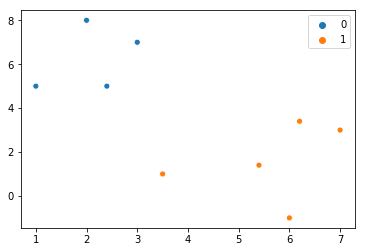

In [3]:
X = np.array([[1, 5],[ 2,  8],[ 3,  7],[ 2.4,  5],
       [ 5.4,  1.4],[ 6.2,  3.4],[ 3.5,  1],
       [ 6, -1],
       [ 7,  3]])

Y = np.array([0,0,0,0, 1, 1, 1,1,1])
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [4]:
model = Support_Vector_Classifier(num_iters=1000,learning_rate=0.01)
model.fit(X,Y)
pred = model.predict(X)
model.classification_report(X,Y)


Confusion Matrix:
 Actual     0  1
Predicted      
0          4  0
1          0  5


,Perc
Accuracy,100.0
True Positive Rate,100.0
True Negative Rate,100.0
Precision,100.0
F1_Score,100.0


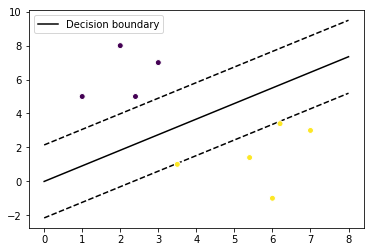

In [5]:
model.plot_decision_boundary(X,Y)

In [6]:
clf = SVC(kernel='linear', C=1.0,gamma='auto')
clf.fit(X, Y)
pp = clf.predict(X)
print('svm.SVC Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

svm.SVC Accuracy:  100.0 %


### Example-2: Linear Seperable

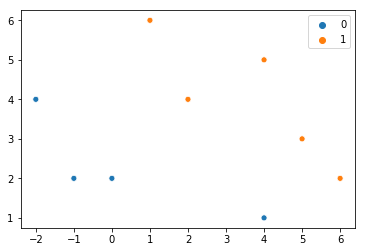

In [7]:
X = np.array(
    [
    [-1,2],[0,2],[-2,4],[4,1],
    [1, 6],[4,5],[5,3],[2, 4],[6, 2]
    ])

Y = np.array([0,0,0,0,1,1,1,1,1])
sns.scatterplot(X[:,0],X[:,1],hue=Y)

In [8]:
model = Support_Vector_Classifier(num_iters=1000,learning_rate=0.01)
model.fit(X,Y)
pred = model.predict(X)
model.classification_report(X,Y)


Confusion Matrix:
 Actual     0  1
Predicted      
0          4  0
1          0  5


,Perc
Accuracy,100.0
True Positive Rate,100.0
True Negative Rate,100.0
Precision,100.0
F1_Score,100.0


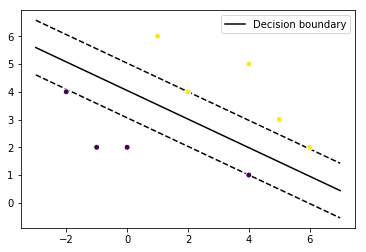

In [9]:
model.plot_decision_boundary(X,Y)

In [10]:
clf = SVC(kernel='linear', C=1.0,gamma='auto')
clf.fit(X, Y)
pp = clf.predict(X)
print('svm.SVC Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

svm.SVC Accuracy:  100.0 %


### Example-3: Linear Non-Seperable

In [11]:
iris = load_iris()
X = iris.data[:,:2]
Y = (iris.target!=0)*1

In [12]:
model = Support_Vector_Classifier(learning_rate=0.001)
model.fit(X,Y)
pred = model.predict(X)

In [13]:
model.classification_report(X,Y)


Confusion Matrix:
 Actual      0    1
Predicted         
0          49    0
1           1  100


,Perc
Accuracy,99.3
True Positive Rate,100.0
True Negative Rate,98.0
Precision,99.0
F1_Score,99.5


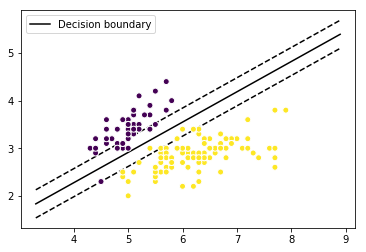

In [14]:
model.plot_decision_boundary(X,Y)

In [15]:
clf = SVC(kernel='linear', C=1.0,gamma='auto')
clf.fit(X, Y)
pp = clf.predict(X)
print('svm.SVC Accuracy: ',round((pp==Y).mean(),3)*100,'%') 

svm.SVC Accuracy:  99.3 %


<b> NOTES :</b>
<br>1) Our results are same as SVC module results.
<br>2) We only used one kernel. In general, Radial basis function is most widely used in SVC.
<br>3) Kernel tricks and soft margins are very interesting. Though i didnt implement it in my code. (Will do some other time).
<br>4) Scaling the input data, might help in performance improvement.